# K-means clustering

In [47]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

### Prepare the data before setting up the model 

In [48]:
# Load data and set title as index - this will need to import data using sql
df = pd.read_csv("../data/cleaned_data.csv", index_col = "title")
df.head()

,Unnamed: 0,isbn13,isbn10,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
title,,,,,,,,,,,,
Gilead,0,9780002005883,0002005883,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
Spider's Web,1,9780002261982,0002261987,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
The One Tree,2,9780006163831,0006163831,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
Rage of angels,3,9780006178736,0006178731,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
The Four Loves,4,9780006280897,0006280897,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [49]:
# Drop unnamed column
df.drop('Unnamed: 0', axis=1, inplace=True)

# Drop columns that we are not using as features
df_reduced = df.drop(columns=["isbn13", "isbn10", "subtitle", "thumbnail", "description"])
df_reduced

,authors,categories,published_year,average_rating,num_pages,ratings_count
title,,,,,,
Gilead,Marilynne Robinson,Fiction,2004.0,3.85,247.0,361.0
Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,2000.0,3.83,241.0,5164.0
The One Tree,Stephen R. Donaldson,American fiction,1982.0,3.97,479.0,172.0
Rage of angels,Sidney Sheldon,Fiction,1993.0,3.93,512.0,29532.0
The Four Loves,Clive Staples Lewis,Christian life,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...
The Monk Who Sold His Ferrari: A Fable About Fulfilling Your Dreams & Reaching Your Destiny,Robin Sharma,Health & Fitness,2003.0,3.82,198.0,1568.0
I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,1999.0,4.51,531.0,104.0
Secrets Of The Heart,Khalil Gibran,Mysticism,1993.0,4.08,74.0,324.0


In [43]:
# One hot-encode categorical variables
dummies_df = pd.get_dummies(df_reduced, columns=['authors', 'categories', "published_year"])
dummies_df.head()

,average_rating,num_pages,ratings_count,authors_A. Hatto,authors_A. M. Homes,authors_A. N. Roquelaure;Anne Rice,authors_A.N. Roquelaure,authors_Aaron Allston,authors_Abbie Hoffman,authors_Abd Al-Hayy Moore,...,published_year_2008.0,published_year_2009.0,published_year_2010.0,published_year_2011.0,published_year_2012.0,published_year_2013.0,published_year_2014.0,published_year_2015.0,published_year_2017.0,published_year_2019.0
title,,,,,,,,,,,,,,,,,,,,,
Gilead,3.85,247.0,361.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Spider's Web,3.83,241.0,5164.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
The One Tree,3.97,479.0,172.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Rage of angels,3.93,512.0,29532.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
The Four Loves,4.15,170.0,33684.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
# Scale the numeric variables
scaled_data = StandardScaler().fit_transform(dummies_df)

In [45]:
# Create a DataFrame with the scaled data
dummies_df_scaled = pd.DataFrame(
    scaled_data,
    columns= dummies_df.columns
)

# Copy the title names from the data
dummies_df_scaled["title"] = dummies_df.index

# Set the coinid column as index
dummies_df_scaled.set_index("title", inplace = True)

# Display sample data
dummies_df_scaled.head()

,average_rating,num_pages,ratings_count,authors_A. Hatto,authors_A. M. Homes,authors_A. N. Roquelaure;Anne Rice,authors_A.N. Roquelaure,authors_Aaron Allston,authors_Abbie Hoffman,authors_Abd Al-Hayy Moore,...,published_year_2008.0,published_year_2009.0,published_year_2010.0,published_year_2011.0,published_year_2012.0,published_year_2013.0,published_year_2014.0,published_year_2015.0,published_year_2017.0,published_year_2019.0
title,,,,,,,,,,,,,,,,,,,,,
Gilead,-0.242610,-0.427309,-0.160644,-0.01256,-0.017764,-0.01256,-0.01256,-0.01256,-0.01256,-0.01256,...,-0.037704,-0.021758,-0.030778,-0.025126,-0.021758,-0.021758,-0.017764,-0.028094,-0.017764,-0.028094
Spider's Web,-0.303199,-0.452603,-0.122194,-0.01256,-0.017764,-0.01256,-0.01256,-0.01256,-0.01256,-0.01256,...,-0.037704,-0.021758,-0.030778,-0.025126,-0.021758,-0.021758,-0.017764,-0.028094,-0.017764,-0.028094
The One Tree,0.120925,0.550731,-0.162157,-0.01256,-0.017764,-0.01256,-0.01256,-0.01256,-0.01256,-0.01256,...,-0.037704,-0.021758,-0.030778,-0.025126,-0.021758,-0.021758,-0.017764,-0.028094,-0.017764,-0.028094
Rage of angels,-0.000253,0.689849,0.072884,-0.01256,-0.017764,-0.01256,-0.01256,-0.01256,-0.01256,-0.01256,...,-0.037704,-0.021758,-0.030778,-0.025126,-0.021758,-0.021758,-0.017764,-0.028094,-0.017764,-0.028094
The Four Loves,0.666227,-0.751917,0.106122,-0.01256,-0.017764,-0.01256,-0.01256,-0.01256,-0.01256,-0.01256,...,-0.037704,-0.021758,-0.030778,-0.025126,-0.021758,-0.021758,-0.017764,-0.028094,-0.017764,-0.028094


### Find best number of K

Find the best number of K <br> we initially ran with 1, 11 but curve kept decaying significantly until the limit, we then tried to 21 and same. 

In [7]:
# Create a list with the number of k-values from 1 to 21 
k = list(range(1, 11))
inertia = []

for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(dummies_df_scaled)
    inertia.append(k_model.inertia_)

c:\Users\ammar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ammar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ammar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ammar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

In [8]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

In [9]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot = df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

elbow_plot

:Curve   [k]   (inertia)

### Run clustering model

In [10]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3, random_state=1)

In [11]:
# Fit the K-Means model using
model.fit(dummies_df_scaled)

c:\Users\ammar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=1)

In [12]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predictions = model.predict(dummies_df_scaled)

# Print the resulting array of cluster values.
print(predictions)

[0 0 0 ... 0 0 0]


In [13]:
# Create a copy of the DataFrame
predictions_df = dummies_df_scaled.copy()

In [14]:
# Add a new column to the DataFrame with the predicted clusters
predictions_df["predicted_clusters"] = predictions

# Display sample data
predictions_df.head()

,average_rating,num_pages,ratings_count,authors_A. Hatto,authors_A. M. Homes,authors_A. N. Roquelaure;Anne Rice,authors_A.N. Roquelaure,authors_Aaron Allston,authors_Abbie Hoffman,authors_Abd Al-Hayy Moore,...,published_year_2009.0,published_year_2010.0,published_year_2011.0,published_year_2012.0,published_year_2013.0,published_year_2014.0,published_year_2015.0,published_year_2017.0,published_year_2019.0,predicted_clusters
title,,,,,,,,,,,,,,,,,,,,,
Gilead,-0.242610,-0.427309,-0.160644,-0.01256,-0.017764,-0.01256,-0.01256,-0.01256,-0.01256,-0.01256,...,-0.021758,-0.030778,-0.025126,-0.021758,-0.021758,-0.017764,-0.028094,-0.017764,-0.028094,0
Spider's Web,-0.303199,-0.452603,-0.122194,-0.01256,-0.017764,-0.01256,-0.01256,-0.01256,-0.01256,-0.01256,...,-0.021758,-0.030778,-0.025126,-0.021758,-0.021758,-0.017764,-0.028094,-0.017764,-0.028094,0
The One Tree,0.120925,0.550731,-0.162157,-0.01256,-0.017764,-0.01256,-0.01256,-0.01256,-0.01256,-0.01256,...,-0.021758,-0.030778,-0.025126,-0.021758,-0.021758,-0.017764,-0.028094,-0.017764,-0.028094,0
Rage of angels,-0.000253,0.689849,0.072884,-0.01256,-0.017764,-0.01256,-0.01256,-0.01256,-0.01256,-0.01256,...,-0.021758,-0.030778,-0.025126,-0.021758,-0.021758,-0.017764,-0.028094,-0.017764,-0.028094,0
The Four Loves,0.666227,-0.751917,0.106122,-0.01256,-0.017764,-0.01256,-0.01256,-0.01256,-0.01256,-0.01256,...,-0.021758,-0.030778,-0.025126,-0.021758,-0.021758,-0.017764,-0.028094,-0.017764,-0.028094,0


In [15]:
clusters_plot = predictions_df.hvplot.scatter(
    x="average_rating",
    y="ratings_count",
    by = "predicted_clusters",
    hover_cols= "title"
)

clusters_plot

:NdOverlay   [predicted_clusters]
   :Scatter   [average_rating]   (ratings_count,title)

### Evaluate the model

In [16]:
# Evaluate using the Calinski-Harabasz Index
labels = model.labels_
metrics.calinski_harabasz_score(dummies_df_scaled, labels)

2.2715149685457083

With 3 cluster: calinsky: 2.27 <br>
With 4 clusters: calinksy: 2.32 <br>
With 25 cluster: calinsky: 2.32 <br>
With 50 clusters: calinsky: 2.14 <br>
With 100 clusters: calinsky: 2.29 <br>

### Find K-value with silhouette method

In [17]:
range_n_clusters = [2,3, 4, 10, 25]

c:\Users\ammar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.018035992292225612


c:\Users\ammar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.19519051626175646


c:\Users\ammar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : -0.05138763244654479


c:\Users\ammar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 10 The average silhouette_score is : -0.17884315779381482


c:\Users\ammar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 25 The average silhouette_score is : -0.23471827903675527


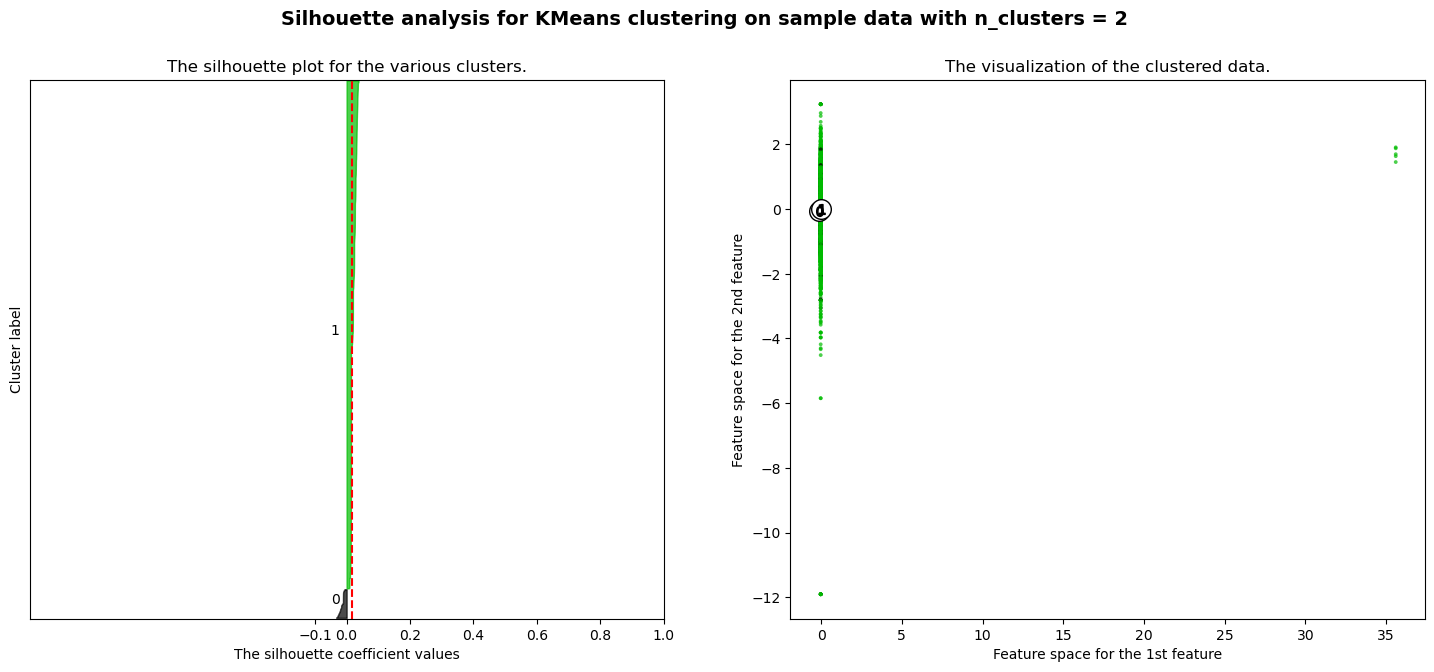

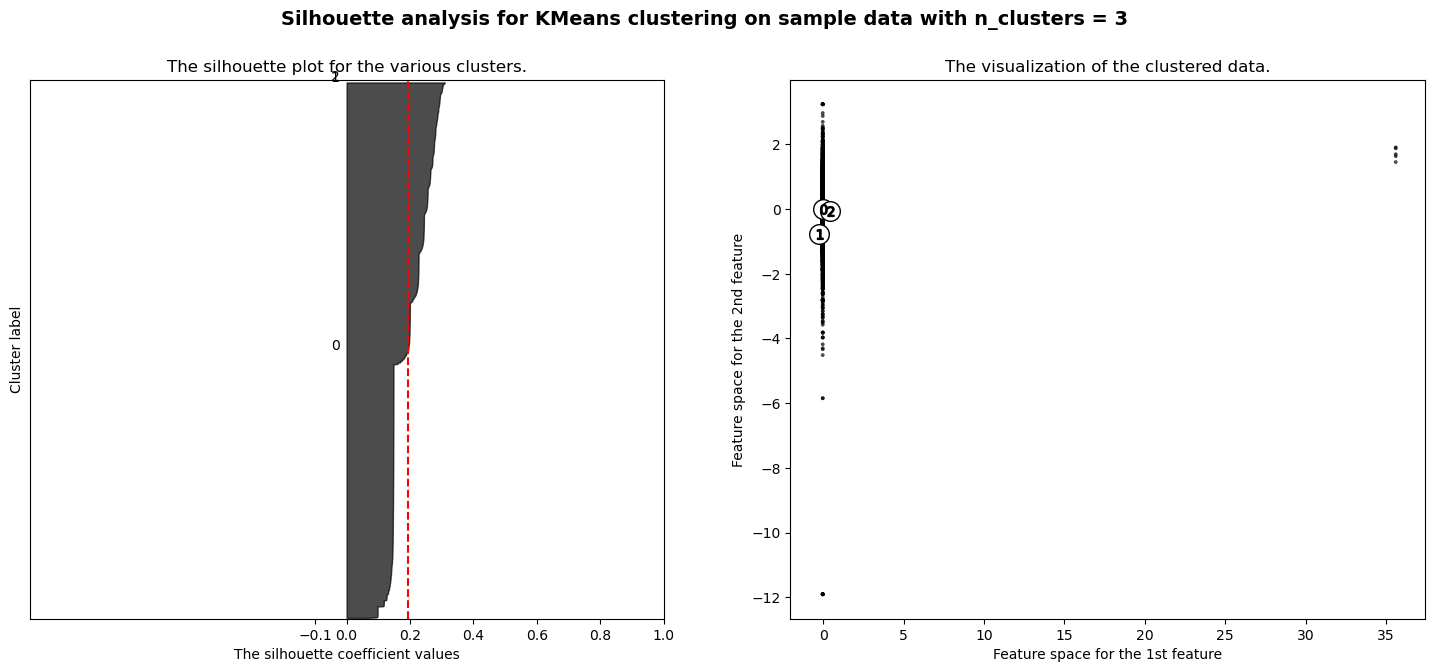

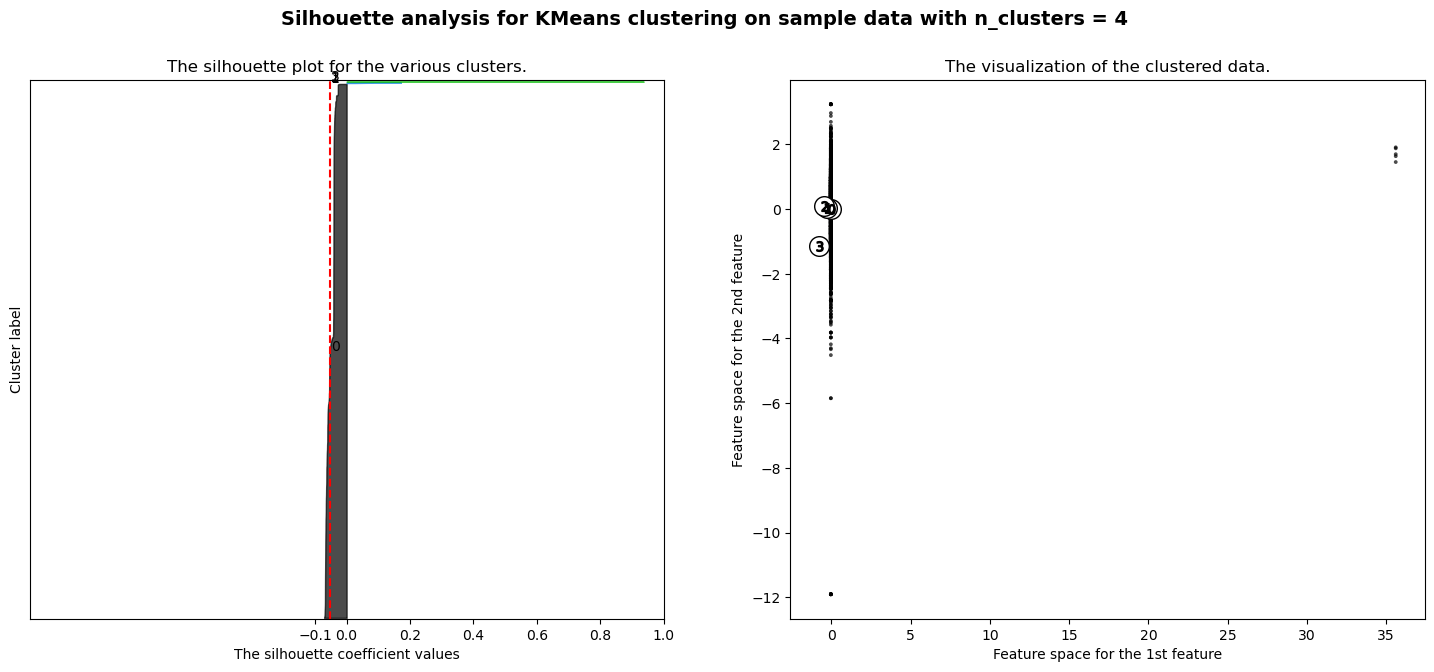

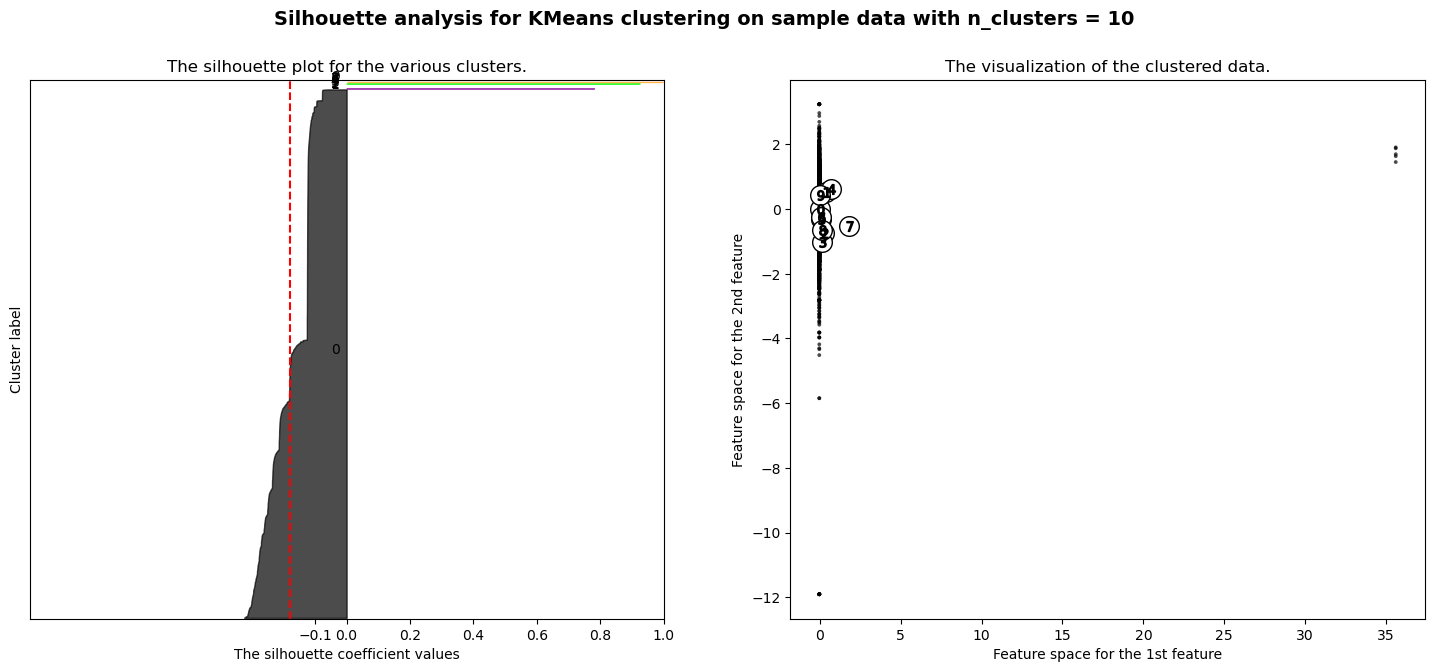

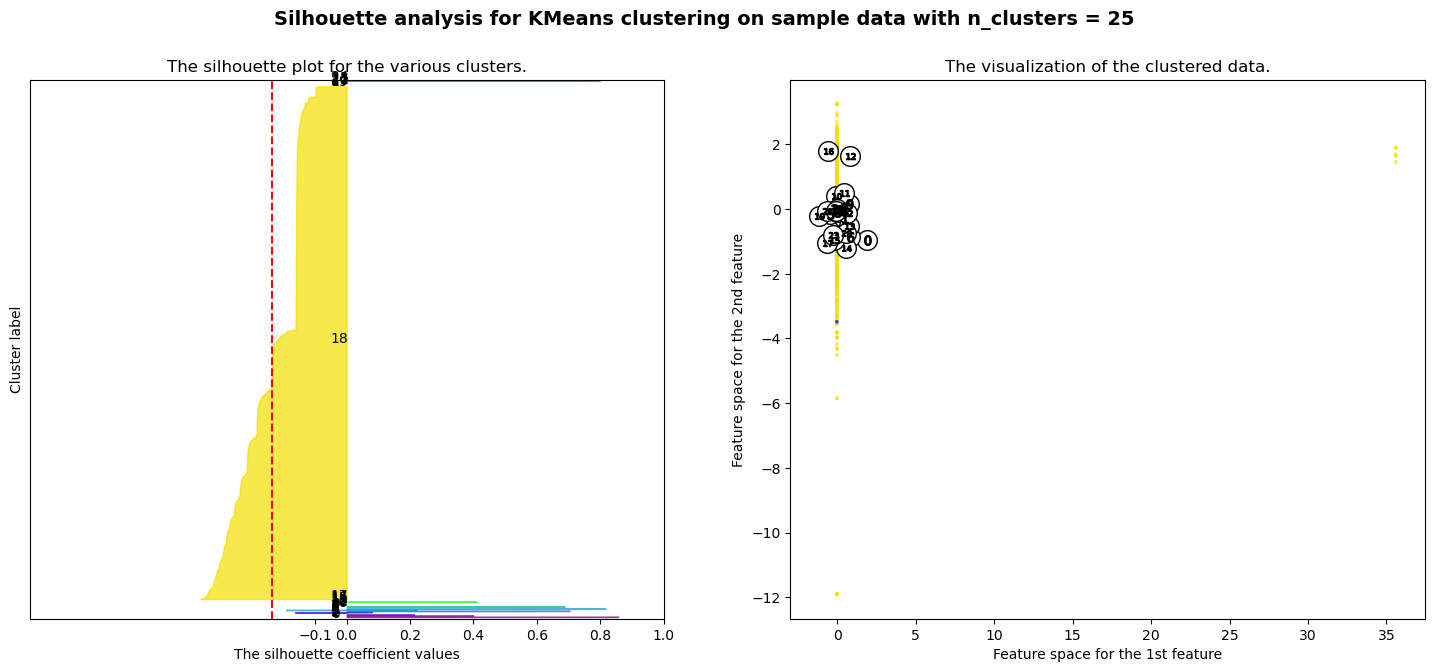

In [18]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1 to 1
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dummies_df_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(dummies_df_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dummies_df_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dummies_df_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        dummies_df_scaled["published_year_2015.0"], dummies_df_scaled["average_rating"], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### PCA

In [19]:
# Create a PCA model instance
pca = PCA(n_components=2)

In [20]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
transformed_df = pca.fit_transform(dummies_df_scaled)

In [21]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.00068958, 0.00058586])

In [22]:
# Create the PCA DataFrame
pca_df = pd.DataFrame(
    transformed_df,
    columns=["PCA1", "PCA2"]
)

# Review the PCA DataFrame
pca_df.head()

,PCA1,PCA2
0,0.053069,0.178572
1,0.155328,-0.189625
2,0.355570,0.050436
3,0.130406,0.239053
4,-0.413634,-0.192092


In [23]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

In [24]:
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(pca_df)
    inertia.append(k_model.inertia_)

c:\Users\ammar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ammar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ammar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ammar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

In [25]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}

# Create the DataFrame from the elbow data
df_elbow = pd.DataFrame(elbow_data)

In [30]:
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

In [27]:
# Define the model Kmeans model using the optimal value of k for the number of clusters.
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(pca_df)

# Make predictions
predictions = model.predict(pca_df)

# Create a copy of the customers_pca_df DataFrame
pca_predictions_df = pca_df.copy()

# Add a class column with the labels
pca_predictions_df["predicted_clusters"] = predictions

c:\Users\ammar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [82]:
# Plot the clusters
pca_predictions_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="predicted_clusters"
)

:NdOverlay   [predicted_clusters]
   :Scatter   [PCA1]   (PCA2)

In [29]:
# Evaluate using the Calinski-Harabasz Index
labels = model.labels_
metrics.calinski_harabasz_score(pca_df, labels)

6162.472226292395

### Filtering the dataset by published year

- In the cleaned dataset drop out/filter published years from below 1970
- Bin published years

In [38]:
filtered_data = df_reduced.loc[df_reduced['published_year']>=1970]

filtered_data

,authors,categories,published_year,average_rating,num_pages,ratings_count
title,,,,,,
Gilead,Marilynne Robinson,Fiction,2004.0,3.85,247.0,361.0
Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,2000.0,3.83,241.0,5164.0
The One Tree,Stephen R. Donaldson,American fiction,1982.0,3.97,479.0,172.0
Rage of angels,Sidney Sheldon,Fiction,1993.0,3.93,512.0,29532.0
The Four Loves,Clive Staples Lewis,Christian life,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...
The Monk Who Sold His Ferrari: A Fable About Fulfilling Your Dreams & Reaching Your Destiny,Robin Sharma,Health & Fitness,2003.0,3.82,198.0,1568.0
I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,1999.0,4.51,531.0,104.0
Secrets Of The Heart,Khalil Gibran,Mysticism,1993.0,4.08,74.0,324.0


Number of rows reduced from 6340 to 6177

In [50]:
filtered_dummies_df = pd.get_dummies(filtered_data, columns=['authors', 'categories', "published_year"])
dummies_df.head()

,average_rating,num_pages,ratings_count,authors_A. Hatto,authors_A. M. Homes,authors_A. N. Roquelaure;Anne Rice,authors_A.N. Roquelaure,authors_Aaron Allston,authors_Abbie Hoffman,authors_Abd Al-Hayy Moore,...,published_year_2008.0,published_year_2009.0,published_year_2010.0,published_year_2011.0,published_year_2012.0,published_year_2013.0,published_year_2014.0,published_year_2015.0,published_year_2017.0,published_year_2019.0
title,,,,,,,,,,,,,,,,,,,,,
Gilead,3.85,247.0,361.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Spider's Web,3.83,241.0,5164.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
The One Tree,3.97,479.0,172.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Rage of angels,3.93,512.0,29532.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
The Four Loves,4.15,170.0,33684.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [51]:
# Scale the numeric variables
filtered_scaled_data = StandardScaler().fit_transform(filtered_dummies_df)

In [55]:
# Create a DataFrame with the scaled data
filtered_dummies_df_scaled = pd.DataFrame(
    filtered_scaled_data,
    columns= filtered_dummies_df.columns
)

# Copy the title names from the data
filtered_dummies_df_scaled["title"] = filtered_dummies_df.index

# Set the coinid column as index
filtered_dummies_df_scaled.set_index("title", inplace = True)

# Display sample data
filtered_dummies_df_scaled.head()

,average_rating,num_pages,ratings_count,authors_A. M. Homes,authors_A. N. Roquelaure;Anne Rice,authors_A.N. Roquelaure,authors_Aaron Allston,authors_Abbie Hoffman,authors_Abd Al-Hayy Moore,authors_Abraham B. Yehoshua;Hillel Halkin,...,published_year_2008.0,published_year_2009.0,published_year_2010.0,published_year_2011.0,published_year_2012.0,published_year_2013.0,published_year_2014.0,published_year_2015.0,published_year_2017.0,published_year_2019.0
title,,,,,,,,,,,,,,,,,,,,,
Gilead,-0.236752,-0.428865,-0.160293,-0.017997,-0.012725,-0.012725,-0.012725,-0.012725,-0.012725,-0.012725,...,-0.038199,-0.022043,-0.031182,-0.025456,-0.022043,-0.022043,-0.017997,-0.028462,-0.017997,-0.028462
Spider's Web,-0.297029,-0.454096,-0.122247,-0.017997,-0.012725,-0.012725,-0.012725,-0.012725,-0.012725,-0.012725,...,-0.038199,-0.022043,-0.031182,-0.025456,-0.022043,-0.022043,-0.017997,-0.028462,-0.017997,-0.028462
The One Tree,0.124912,0.546743,-0.161791,-0.017997,-0.012725,-0.012725,-0.012725,-0.012725,-0.012725,-0.012725,...,-0.038199,-0.022043,-0.031182,-0.025456,-0.022043,-0.022043,-0.017997,-0.028462,-0.017997,-0.028462
Rage of angels,0.004357,0.685514,0.070783,-0.017997,-0.012725,-0.012725,-0.012725,-0.012725,-0.012725,-0.012725,...,-0.038199,-0.022043,-0.031182,-0.025456,-0.022043,-0.022043,-0.017997,-0.028462,-0.017997,-0.028462
The Four Loves,0.667407,-0.752665,0.103672,-0.017997,-0.012725,-0.012725,-0.012725,-0.012725,-0.012725,-0.012725,...,-0.038199,-0.022043,-0.031182,-0.025456,-0.022043,-0.022043,-0.017997,-0.028462,-0.017997,-0.028462


Number of rows reduced from 4228 to 4116

#### Running the pca model

In [63]:
# Create a PCA model instance
filtered_pca = PCA(n_components=2)

In [64]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
filtered_transformed_df = filtered_pca.fit_transform(filtered_dummies_df_scaled)

In [65]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
filtered_pca.explained_variance_ratio_

array([0.00056725, 0.00053611])

In [67]:
# Create the PCA DataFrame
filtered_pca_df = pd.DataFrame(
    filtered_transformed_df,
    columns=["PCA1", "PCA2"]
)

In [68]:
# Review the PCA DataFrame
filtered_pca_df.head()

,PCA1,PCA2
0,0.135806,-0.887903
1,-0.387986,-0.594765
2,-0.215810,0.865134
3,0.329493,0.300672
4,-2.076993,-0.438435


In [69]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(filtered_pca_df)
    inertia.append(k_model.inertia_)

c:\Users\ammar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ammar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ammar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ammar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

In [70]:
# Define a DataFrame to hold the values for k and the corresponding inertia
filtered_elbow_data = {"k": k, "inertia": inertia}

In [71]:
# Create the DataFrame from the elbow data
filtered_df_elbow = pd.DataFrame(filtered_elbow_data)

In [73]:
# Plot the DataFrame
filtered_df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

In [74]:
# Define the model Kmeans model using the optimal value of k for the number of clusters.
filtered_model = KMeans(n_clusters=4, random_state=0)

In [75]:
# Fit the model
filtered_model.fit(filtered_pca_df)

c:\Users\ammar\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [76]:
# Make predictions
filtered_predictions = filtered_model.predict(filtered_pca_df)

In [77]:
# Create a copy of the customers_pca_df DataFrame
filtered_pca_predictions_df = filtered_pca_df.copy()

In [78]:
# Add a class column with the labels
filtered_pca_predictions_df["predicted_clusters"] = filtered_predictions

In [83]:
# Plot the clusters
filtered_pca_predictions_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="predicted_clusters"
)

:NdOverlay   [predicted_clusters]
   :Scatter   [PCA1]   (PCA2)

In [80]:
# Evaluate using the Calinski-Harabasz Index
filtered_labels = filtered_model.labels_
metrics.calinski_harabasz_score(filtered_pca_df, filtered_labels)

2044.6250015586088

### Binning Published Years